> [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vicnetto/ds-python/blob/master/introduction/ds_introduction.ipynb) <h1>Introdução a Data Science</h1>
(ABRA PELO GOOGLE COLAB PARA MELHOR VISUALIZAÇÃO)

### Objetivo

O objetivo desses pequenos markdown's é traduzir alguns cursos para o português e aprender um pouco sobre Ciência de Dados. Os conteúdos apresentados nessa pasta são de diversos cursos online, como Alura, Coursera e Udemy.

## Pandas


### O que é **Pandas**

A biblioteca **Pandas** é utilizada para realizar a leitura dos arquivos .csv, onde os dados estão armazenados. Por exemplo, no código abaixo, estamos abrindo uma grande quantidade de notas de avaliações de filmes (retirado do site [MovieLens](https://grouplens.org/datasets/movielens/)), somente utilizando um comando da bibloteca.

Primeiramente, é necessário um arquivo *.csv*, que será aberto pelo Python para explorar e começar a estudar os dados.

> Um arquivo .csv (*comma separated value*) é um arquivo .txt com valores separados entre virgulas.

## Abrindo as primeiras tabelas e alguns comandos básicos

In [1]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Ou podemos simplesmente apresentar apenas os **primeiros cinco elementos** dessa lista, do seguinte modo:


In [2]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para saber a **quantidade de elementos** que estão sendo apresentados e **quantas colunas** existem nesse arquivo, podemos acessar com:

In [3]:
notas.shape

(100836, 4)

Para alterar o **nome das colunas** é possível inserir o comando *colums*, próprio do pacote Pandas, na seguinte forma:

In [4]:
notas.columns = ["usuarioID", "filmeID", "nota", "tempo"]
notas.head()

,usuarioID,filmeID,nota,tempo
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Existem diversas funções para essas tabelas (conhecidas como **dataframes**), que podem ser procuradas na documentação.

Agora, podemos mexer somente com algumas colunas, e trabalhar com dados somente delas (conhecidas como **series**), do seguinte jeito:

In [5]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

E assim como as **dataframes**, existem diversas funções que podem ser acessadas nas **series**, como para ver quais são os unicos elementos utilizando a função *unique()*, ver a quantidade de cada uma com *value_counts()* e calcular alguns valores sobre o nosso gráfico:

> Um destaque para o comando *describe()*, que mostra alguns valores consideravelmente importantes.

In [6]:
print(notas['nota'].unique())  # Vê elementos únicos.
print("---------------")
print(notas['nota'].value_counts())  # Vê a quantidade de cada um.
print("---------------")
print("Media:", notas['nota'].mean())  # Calcula a média de todas as notas.
print("Mediana:", notas['nota'].median())  # Calcula a mediana das notas.
notas.nota.describe()  # Calcula alguns valores considerados importantes.

[4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]
---------------
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64
---------------
Media: 3.501556983616962
Mediana: 3.5


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

## Visualizando dados com *histograma* e *boxplot* com **seaborn**

Um comando extremamente importante é o para **plotar** o gráfico. Certamente existem diversos meios de plotar o gráfico e diversas relações que podemos ter, mas nesse exemplo iremos utilizar o *histograma*, que basicamente mostra cada quantidade mas em colunas verticais, para realmente separar os dados. Para printar um gráfico utilizaremos a função *plot()*:

> Agora estamos utilizando **notas.nota** para representar somente a coluna, sem precisar ficar procurando pela coluna e indo direto pelo nome.

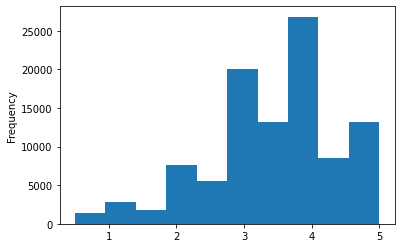

In [7]:
notas.nota.plot(kind='hist')

Agora, com o **seaborn**, podemos apresentar um gráfico diferente conhecido como **boxplot**, onde apresenta todas as grandes informações em apenas um gráfico:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


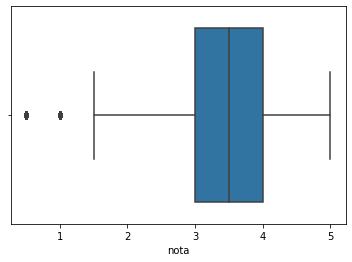

In [8]:
import seaborn as sns

sns.boxplot(notas.nota)

> Como *curiosidade*, as duas barras azuis representam 50% dos dados, enquanto os outros "braços" representam mais 25% para cada um dos lados.

## Comparando as notas dos filmes

Para tirar algumas referências agora, podemos ver quais são os filmes que apresentam esses dados. Para fazer isso, só é necessário procurar o ID certo no arquivo *ratings.csv*. Então primeiramente, vamos ver os primeiros 5 fillmes do *moveis.csv*:

In [9]:
movies = pd.read_csv("movies.csv")  # Lê o arquivo.
movies.columns = ["filmeID", "titulo", "genero"]  # Altera o nome das colunas.
movies.head()  # Mostra os 5 primeiros arquivos.

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Agora, é possível tirar algumas primeiras conclusões. Procurando no *ratings.csv* um pouco sobre o filme _Toy Story_, encontramos que a sua **média** é:

In [10]:
notas.query("filmeID==1").nota.mean()  # Query faz uma "pergunta", retornando todas as avaliações de Toy Story, assim sendo fácil tirar a média.

3.9209302325581397

Tirando agora dados de todos os filmes, é possível fazer o seguinte:

In [11]:
media_filmes = notas.groupby("filmeID").mean().nota  # Agrupando em relação ao filmeID e calculando as devidas médias.
media_filmes

filmeID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

E plotando tudo em um *histograma* para fazer o estudo dos dados:

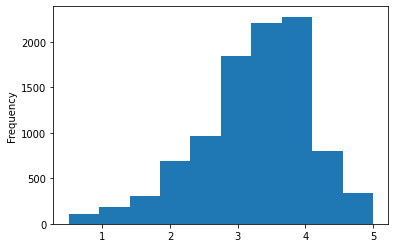

In [12]:
media_filmes.plot(kind='hist')

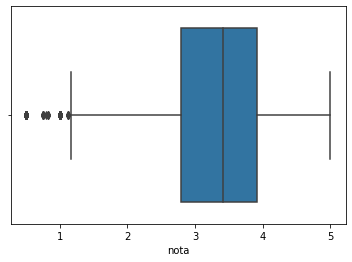

In [13]:
sns.boxplot(media_filmes)

### Usando a biblioteca **matplotlib**

Como por de baixo dos panos a biblioteca **matplotlib** é utilizada por todas as grandes bibliotecas, também podemos utilizar dela para alterar dados como o **tamanho** do nosso gráfico.

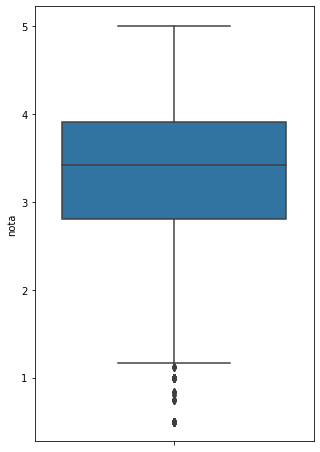

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))  # Alterando o tamanho da imagem, para melhor visualização.
sns.boxplot(y=media_filmes)  # Alterando o eixo com a igualdade y.

## Utilizando agora o **TMDB**

Os dados dessa parte foram retirados do site [TMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata/data).

> Quando temos apenas nomes em uma coluna, dizemos que é uma categoria **nominal**. Igual quando temos uma coluna apenas com números, mas que não tem significado realmente numérico, onde chamamos de categórica **ordinal**.

In [15]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")  # Lendo o arquivo de texto e apresentando em formato de tabela (dataframe).
tmdb.head()  # Mostrando os 5 primeiros elementos

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Classificando todos os filmes por idioma (**no formato de tabela**), para ver quais são os idiomas mais apresentados podemos fazer.



In [16]:
# to_frame -> Coloca em formato de dataframe, como se fosse mesmo uma tabela formatada.
# reset_index -> Tira o index e transforma em outra tabela.
tmdb_total = tmdb.original_language.value_counts().to_frame().reset_index() 
tmdb_total.columns = ["original_language", "quantity"]
tmdb_total.head()

,original_language,quantity
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


Fazendo uma tabela básica com esses dados, temos o seguinte gráfico de barras:

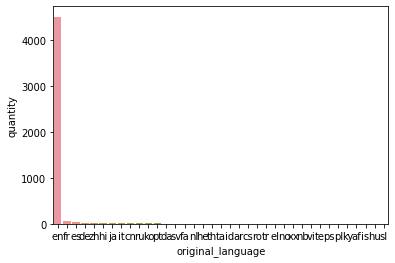

In [17]:
sns.barplot(x = "original_language", y = "quantity", data = tmdb_total)

> Apesar de parecer extremamente fácil, podemos usar a função *sns.catplot()* do **seaborn**, que faz todo o processo sozinho. Porém, como todas as ferramentas que obtém-se facilidade, a função é mais de *alto nível*.

#### Um pouco sobre **data visualization**

Logicamente que existem diversos meios de apresentar os dados, diante de vários tipos de gráficos. Isso depende das situações, como podemos ver no último gráfico que fizemos, os dados não ficaram nada claros. Por isso, podemos usar de outros recursos para mostrar corretamente o que queremos, como por exemplo separar os filmes em inglês e agrupar todos os outros para mostra-los em geral, dessa forma:

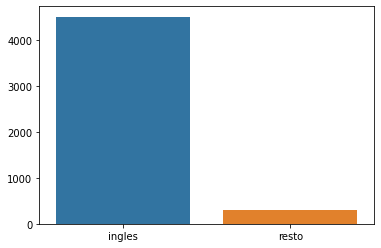

In [18]:
total_valores = tmdb.original_language.value_counts()  # Contando quantidades de cada idioma.
somente_ingles = total_valores.loc["en"]  # Separando o inglẽs.
resto = total_valores.sum() - somente_ingles  # Separando os outros idiomas.

linguagens_filmes = dict(idioma=["ingles", "resto"], quantidade=[somente_ingles, resto])  # Fazendo um dicionário em formato de tabela.

sns.barplot(x = "idioma", y = "quantidade", data = linguagens_filmes)  # Mostrando esse dicionário da forma certa.

> É perceptível a diferença feita por um gráfico que realmente apresenta o que deve ser mostrado, de um que segrega as informações.